In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
df = pd.read_csv('./data/개별기업뉴스_전처리/AJ네트웍스.csv',index_col=0)
print(len(df))
df.head()

907


,날짜,뉴스제목,뉴스요약
1313,2016-01-04,"AJ네트웍스, SKB 등에업고 '고리사채급 위약금 폭탄'",AJ네트웍스가 SK브로드밴드를 통해 진행중인 '스마트렌탈'의 위약금 규정 및 취급상...
1312,2016-01-05,"AJ네트웍스, 스마트폰, 태블릿PC 렌탈사업 시작","국내 IT기기 렌탈의 선두주자인 AJ네트웍스에서 Mobile Device(스마트폰,..."
1311,2016-01-06,"AJ네트웍스, 스마트폰, 태블릿PC 등 Mobile Device 렌탈 사업 시작","국내 IT기기 렌탈의 선두주자인 AJ네트웍스에서 Mobile Device(스마트폰,..."
1332,2016-01-13,"AJ네트웍스, 파렛트및 고소장비 렌탈 신규 서비스 브랜드 런칭",AJ네트웍스(사장 반채운)가 파렛트와 고소장비 렌탈 부문의 신규 서비스 브랜드를 런...
1335,2016-01-22,대상·AJ네트웍스 등 비우량채도 잇달아 발행 성공,신용등급이 BBB+인 AJ네트웍스도 회사채 발행을 위해 지난 20일 투자자들을 대상...


# 뉴스빈도

In [31]:
date_idx = pd.date_range('2016-01-01','2022-05-30')
date_idx

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28',
               '2022-05-29', '2022-05-30'],
              dtype='datetime64[ns]', length=2342, freq='D')

In [29]:
ser_date = df['날짜'].value_counts().sort_index()
ser_date

2016-01-04    1
2016-01-05    1
2016-01-06    1
2016-01-13    1
2016-01-22    1
             ..
2022-05-14    1
2022-05-15    1
2022-05-16    1
2022-05-23    1
2022-05-25    4
Name: 날짜, Length: 558, dtype: int64

In [33]:
import pandas as pd

idx = pd.date_range('2016-01-01','2022-05-30')

ser_date = df['날짜'].value_counts().sort_index()

ser_date.index = pd.DatetimeIndex(ser_date.index)

ser_date = ser_date.reindex(idx, fill_value=0)
ser_date

2016-01-01    0
2016-01-02    0
2016-01-03    0
2016-01-04    1
2016-01-05    1
             ..
2022-05-26    0
2022-05-27    0
2022-05-28    0
2022-05-29    0
2022-05-30    0
Freq: D, Name: 날짜, Length: 2342, dtype: int64

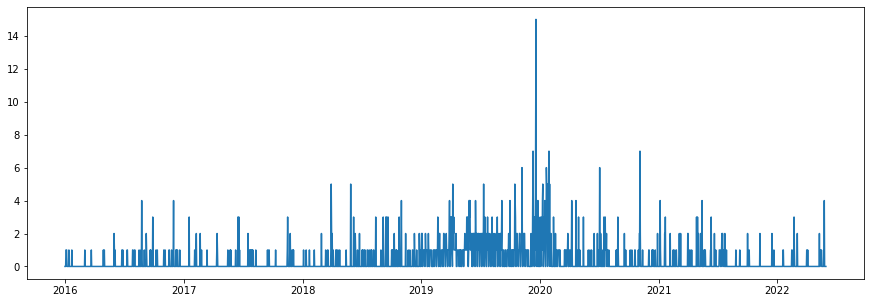

In [37]:
plt.figure(figsize=(15,5))
plt.plot(ser_date.index, ser_date)

In [348]:
import FinanceDataReader as fdr
df_p = fdr.DataReader('095570','2016-01-01','2022-03-31')
df_nc = ser_date.to_frame()
df_nc.head()

,날짜
2016-01-01,0
2016-01-02,0
2016-01-03,0
2016-01-04,1
2016-01-05,1


In [349]:
df_merge1 = pd.merge(df_p,df_nc,left_index=True,right_index=True,how='left')
df_merge1.head()

,Open,High,Low,Close,Volume,Change,날짜
Date,,,,,,,
2016-01-04,9560,9730,9420,9600,20135,0.019108,1
2016-01-05,9450,9550,9360,9540,8225,-0.006250,1
2016-01-06,9610,9610,9440,9560,7271,0.002096,1
2016-01-07,9580,9580,9120,9300,5358,-0.027197,0
2016-01-08,9050,9330,9040,9220,7056,-0.008602,0


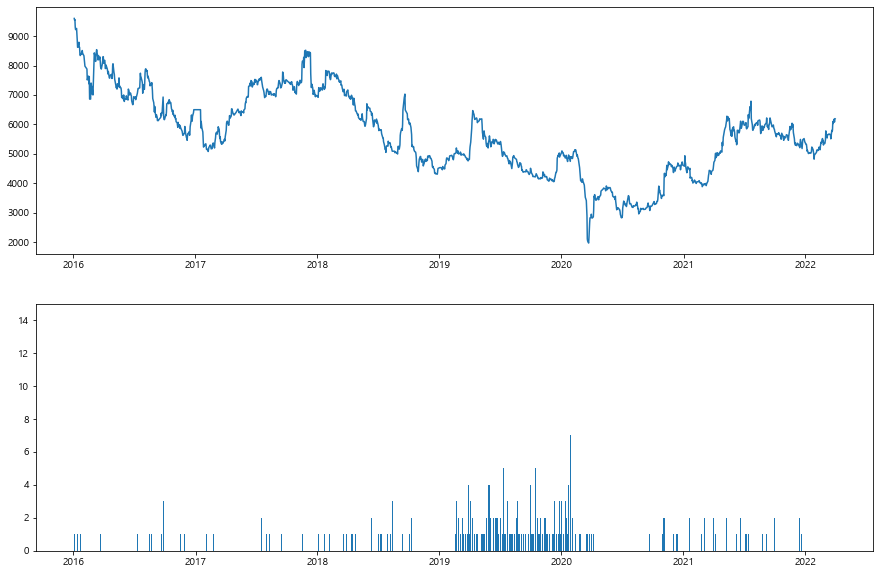

In [351]:

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(df_merge1.index,df_merge1['Close'])

plt.subplot(2,1,2)
plt.ylim(0,np.max(df_merge1['날짜']))
plt.bar(df_merge1.index, df_merge1['날짜'])

plt.show()

# 키워드 빈도

In [77]:
import re
from pykospacing import Spacing

In [266]:
df = pd.read_csv('./data/개별기업뉴스_전처리/AJ네트웍스.csv',index_col=0)
print(len(df))
df.head()

907


,날짜,뉴스제목,뉴스요약
1313,2016-01-04,"AJ네트웍스, SKB 등에업고 '고리사채급 위약금 폭탄'",AJ네트웍스가 SK브로드밴드를 통해 진행중인 '스마트렌탈'의 위약금 규정 및 취급상...
1312,2016-01-05,"AJ네트웍스, 스마트폰, 태블릿PC 렌탈사업 시작","국내 IT기기 렌탈의 선두주자인 AJ네트웍스에서 Mobile Device(스마트폰,..."
1311,2016-01-06,"AJ네트웍스, 스마트폰, 태블릿PC 등 Mobile Device 렌탈 사업 시작","국내 IT기기 렌탈의 선두주자인 AJ네트웍스에서 Mobile Device(스마트폰,..."
1332,2016-01-13,"AJ네트웍스, 파렛트및 고소장비 렌탈 신규 서비스 브랜드 런칭",AJ네트웍스(사장 반채운)가 파렛트와 고소장비 렌탈 부문의 신규 서비스 브랜드를 런...
1335,2016-01-22,대상·AJ네트웍스 등 비우량채도 잇달아 발행 성공,신용등급이 BBB+인 AJ네트웍스도 회사채 발행을 위해 지난 20일 투자자들을 대상...


In [267]:
df.iloc[1,2]

"국내 IT기기 렌탈의 선두주자인 AJ네트웍스에서 Mobile Device(스마트폰, Tablet 등)의 렌탈 사업을 시작한다. 스마트폰의 렌탈은 미국 A사의 1년 마다 새 기기로 바꿔주는 'Upgrade Program'으로 고객들의 관심을 받은 바..."

In [268]:
df_n = df.groupby('날짜')['뉴스제목'].sum().to_frame()
df_n.head()

,뉴스제목
날짜,
2016-01-04,"AJ네트웍스, SKB 등에업고 '고리사채급 위약금 폭탄'"
2016-01-05,"AJ네트웍스, 스마트폰, 태블릿PC 렌탈사업 시작"
2016-01-06,"AJ네트웍스, 스마트폰, 태블릿PC 등 Mobile Device 렌탈 사업 시작"
2016-01-13,"AJ네트웍스, 파렛트및 고소장비 렌탈 신규 서비스 브랜드 런칭"
2016-01-22,대상·AJ네트웍스 등 비우량채도 잇달아 발행 성공


In [269]:
# 모든 날짜 채우기
idx = pd.date_range('2016-01-01','2022-03-31')
df_n.index = pd.DatetimeIndex(df_n.index)
df_n = df_n.reindex(idx, fill_value= '')
df_n.head()

,뉴스제목
2016-01-01,
2016-01-02,
2016-01-03,
2016-01-04,"AJ네트웍스, SKB 등에업고 '고리사채급 위약금 폭탄'"
2016-01-05,"AJ네트웍스, 스마트폰, 태블릿PC 렌탈사업 시작"


In [315]:
# 모든 날짜 채워주기 (2016-01-01 ~ 2022-03-31)
def fill_date(df):
    
    # 날짜로 묶기
    df = df.groupby('날짜')['뉴스제목'].sum().to_frame()
    
    # 모든 날짜 채우기
    idx = pd.date_range('2016-01-01','2022-03-31')
    df.index = pd.DatetimeIndex(df.index)
    df = df.reindex(idx, fill_value= '')
    
    return df

## 전처리: 특수문자제거-> 띄어쓰기 -> 명사토큰화 -> 불용어 제거

### 특수문자 제거:clean_text()

In [270]:
def clean_text(docs):
    docs = re.sub('[^가-힣A-Za-z ]', '', docs)
    docs = re.sub('\s+', ' ', docs)
    docs = '' if docs== ' ' else docs
    return docs

In [271]:
df_n['뉴스1'] = df_n['뉴스제목'].apply(clean_text)
df_n.head()

,뉴스제목,뉴스1
2016-01-01,,
2016-01-02,,
2016-01-03,,
2016-01-04,"AJ네트웍스, SKB 등에업고 '고리사채급 위약금 폭탄'",AJ네트웍스 SKB 등에업고 고리사채급 위약금 폭탄
2016-01-05,"AJ네트웍스, 스마트폰, 태블릿PC 렌탈사업 시작",AJ네트웍스 스마트폰 태블릿PC 렌탈사업 시작


In [272]:
# df['뉴스1'] = df['뉴스제목'].apply(clean_text)
# df['뉴스1']

### 띄어쓰기 : spacing()

In [273]:
%%time
spacing = Spacing()
df_n['뉴스2'] = df_n['뉴스1'].apply(spacing)
df_n['뉴스2']

Wall time: 1min 5s


2016-01-01                                  
2016-01-02                                  
2016-01-03                                  
2016-01-04    AJ네트웍스 SKB 등에 업고 고리 사채급 위약금 폭탄
2016-01-05        AJ네트웍스 스마트폰 태블릿PC 렌탈 사업 시작
                           ...              
2022-03-27                                  
2022-03-28                                  
2022-03-29                                  
2022-03-30                                  
2022-03-31                                  
Freq: D, Name: 뉴스2, Length: 2282, dtype: object

In [196]:
# %%time
# ser_n2 = ser_n1.apply(spacing)
# ser_n2

날짜
2016-01-04                       AJ네트웍스 SKB 등에 업고 고리 사채급 위약금 폭탄
2016-01-05                           AJ네트웍스 스마트폰 태블릿PC 렌탈 사업 시작
2016-01-06          AJ네트웍스 스마트폰 태블릿PC 등 Mobile Dev ice 렌탈 사업 시작
2016-01-13                   AJ네트웍스 파렛트 및 고소장비 렌탈 신규 서비스 브랜드 런칭
2016-01-22                          대상 AJ네트웍스 등 비우량채도 잇달아 발행 성공
                                    ...                        
2022-05-14                     주요 공시 싸이버 원인지 디스플레키움증권 AJ네트웍스 비엘
2022-05-15                     AJ네트웍스 분기 연결기준 영업이익 억 원 어닝 서프라이즈
2022-05-16                                  AJ네트웍스 분기 영업익 억원 전년
2022-05-23                                AJ네트웍스 억 단기 차입금 증가 결정
2022-05-25    투자심리과열 종목 AJ네트웍스 윌링스 상승 크로바 하이텍일진 머티리얼 리포트 브리핑...
Name: 뉴스제목, Length: 558, dtype: object

## 영단어 추출: eng_extract

In [136]:
def eng_extract(docs):
    docs = re.sub('[^a-zA-Z ]','',docs)
    docs = re.sub('\s+',' ',docs)
    return docs

In [139]:
# 의미 있긴할텐데 애매하다
df['뉴스2'].apply(eng_extract).value_counts()[:30]

 AJ               373
AJ                271
ET AJ              48
 AJ                35
AJ AJ              17
AJ VI              15
fnRASSIAJ          15
 AJ AJ             13
AJ PER PBR PER     10
 AJ Q               9
BBB AJ              5
AJ AJ MOU           5
 AJ AJ              5
 AJ SK              5
AJ BB               5
IB AJ               4
 M AJ               4
AJ IT               4
 AJ BBB             4
ET AJ p             2
 SK AJ              2
AJ ESG              2
AJ CU               2
 AJ KB              2
 Top AJ             1
AJ MOUIT            1
SK AJ               1
 TOP AJ             1
Q AJ                1
AJ MOU              1
Name: 뉴스2, dtype: int64

## 명사 토큰화: han.nouns

In [48]:
# 모듈
from konlpy.tag import Hannanum,Kkma,Komoran,Okt

kkma = Kkma()
kom = Komoran()
han = Hannanum()
okt = Okt()

In [121]:
df['뉴스2'].apply(okt.nouns)[:20]

1313                       [네트웍, 스, 등, 고리, 사채, 위약금, 폭탄]
1312                    [네트웍, 스, 스마트폰, 태블릿, 렌탈, 사업, 시작]
1311                 [네트웍, 스, 스마트폰, 태블릿, 등, 렌탈, 사업, 시작]
1332     [네트웍, 스, 파렛트, 및, 고소, 장비, 렌탈, 신규, 서비스, 브랜드, 런칭]
1335              [대상, 네트웍, 스, 등, 비, 우량, 채도, 달, 발행, 성공]
1338               [종목, 전략, 플러스, 네트웍, 스렌, 탈, 업계, 절대, 강]
1318        [네트웍, 스, 신규, 사업, 본격, 추진, 성장, 구간, 진입, 유, 안타]
1306                               [더벨, 네트웍, 스, 급, 자존심]
1305                           [네트웍, 스, 수익, 수요, 예측, 호조]
1323           [기업, 분석, 리포트, 네트웍, 스, 예견, 실, 매수, 유지, 한국]
1331                          [상반기, 우수, 특허, 대상, 네트웍, 스]
1304              [테마, 네트웍, 스, 기관, 투자자, 거래, 참여, 거래, 비중]
1299              [테마, 네트웍, 스, 기관, 투자자, 거래, 참여, 거래, 비중]
1298         [테마, 네트웍, 스, 관련, 종목, 사이, 변동, 폭, 작고, 상, 승률]
1297           [테마, 네트웍, 스, 외국인, 기관, 매수, 개인, 매도, 달, 누적]
1296    [잡코리아, 공동, 기획, 청년, 희망, 슈퍼, 기업, 네트웍, 스, 커플링, 반점]
1289             [테마, 네트웍, 스, 관련, 종목, 상승, 우위, 서비스업, 업종]
1288              [테마, 네트웍, 스, 기관, 투자자, 거래, 참여, 

In [119]:
df['뉴스2'].apply(kom.nouns)[:20]

1313                    [등, 고리, 사채, 급, 위약금, 폭탄]
1312                 [스마트폰, 태블릿, PC, 레, 사업, 시작]
1311              [스마트폰, 태블릿, PC, 등, 레, 사업, 시작]
1332             [파렛트, 고소, 장비, 레, 신규, 서비스, 브랜드]
1335                    [대상, 등, 우량, 채도, 발행, 성공]
1338                  [종목, 전략, 플러스, 업계, 절대, 강자]
1318            [신규, 사업, 추진, 성장, 구간, 진입, 유, 안타]
1306                                   [급, 자존심]
1305                           [수익, 수요, 예측, 호조]
1323           [기업, 분석, 리포트, 예견, 실, 매수, 유지, 한국]
1331                          [상반기, 우수, 특허, 대상]
1304              [테마, 기관, 투자자, 거래, 참여, 거래, 비중]
1299              [테마, 기관, 투자자, 거래, 참여, 거래, 비중]
1298              [테마, 관련, 종목, 사이에서, 변동, 폭, 상승]
1297        [테마, 외국인, 기관, 순, 매수, 개인, 매도, 달, 누적]
1296    [잡코리아, 공동, 기획, 청년, 희망, 슈퍼, 기업, 커플링, 반점]
1289             [테마, 관련, 종목, 상승, 우위, 서비스업, 업종]
1288              [테마, 기관, 투자자, 거래, 참여, 거래, 비중]
1287                      [베트남, 사우디, 레, 사업, 확대]
1285                          [통합, 서비스, 브랜드, 레]
Name: 뉴스2, dtype: object

In [120]:
# 분류 가장 잘함
df['뉴스2'].apply(han.nouns)[:20]

1313                     [AJ네트웍스, 등, 사채급, 위약금, 폭탄]
1312             [AJ네트웍스, 스마트폰, 태블릿PC, 렌탈, 사업, 시작]
1311          [AJ네트웍스, 스마트폰, 태블릿PC, 등, 렌탈, 사업, 시작]
1332     [AJ네트웍스, 파렛트, 고소장비, 렌탈, 신규, 서비스, 브랜드, 런칭]
1335                  [대상, AJ네트웍스, 등, 우량채, 발행, 성공]
1338           [종목, 전략, 플러스, AJ네트웍스렌탈, 업계, 절대, 강자]
1318      [AJ네트웍스, 신규, 사업, 격, 추진, 성장, 구간, 진입, 유안타]
1306                          [더벨, AJ네트웍스, 자존심, 보]
1305                       [AJ네트웍스, 수익성, 수요예측, 호조]
1323            [기업분석, 리포트, AJ네트웍스, 예견, 실매수, 유지한국]
1331                       [상반기, 우수특허, 대상, AJ네트웍스]
1304             [테마, AJ네트웍스, 기관투자자, 것, 참여, 것, 비중]
1299             [테마, AJ네트웍스, 기관투자자, 것, 참여, 것, 비중]
1298           [테마, AJ네트웍스, 관련, 종목들, 사이, 변동폭, 상승률]
1297      [테마, AJ네트웍스, 외국, 기관, 순매수, 개인, 순매, 달, 누적]
1296    [n잡코리아, 공동기획, 청년희망, 슈퍼기업, AJ네트웍스, 커플링, 반점]
1289       [테마, AJ네트웍스, 관련, 종목들, 상승, 우위, 서비스업, 업종]
1288             [테마, AJ네트웍스, 기관투자자, 것, 참여, 것, 비중]
1287                [AJ네트웍스, 베트남, 사우디, 렌탈, 사업, 확대]
1285                [AJ네트웍스, 통합

In [274]:
%%time
df_n['뉴스3'] = df_n['뉴스2'].apply(han.nouns)
df_n.head()

,뉴스제목,뉴스1,뉴스2,뉴스3
2016-01-01,,,,[]
2016-01-02,,,,[]
2016-01-03,,,,[]
2016-01-04,"AJ네트웍스, SKB 등에업고 '고리사채급 위약금 폭탄'",AJ네트웍스 SKB 등에업고 고리사채급 위약금 폭탄,AJ네트웍스 SKB 등에 업고 고리 사채급 위약금 폭탄,"[AJ네트웍스, 등, 사채급, 위약금, 폭탄]"
2016-01-05,"AJ네트웍스, 스마트폰, 태블릿PC 렌탈사업 시작",AJ네트웍스 스마트폰 태블릿PC 렌탈사업 시작,AJ네트웍스 스마트폰 태블릿PC 렌탈 사업 시작,"[AJ네트웍스, 스마트폰, 태블릿PC, 렌탈, 사업, 시작]"


In [212]:
# ser_n3 = ser_n2.apply(han.nouns)

## 불용어 제거: remove_stwords

In [284]:
stw_list = pd.read_csv('./data/stopwords-ko.txt')
def remove_stwords(docs):
    docs = [w for w in docs if not w in stw_list]
    docs = '' if docs== ' ' else docs
    return ' '.join(docs)

In [285]:
df_n['뉴스4'] = df_n['뉴스3'].apply(remove_stwords)
df_n.head()

,뉴스제목,뉴스1,뉴스2,뉴스3,뉴스4,뉴스5
2016-01-01,,,,[],,[]
2016-01-02,,,,[],,[]
2016-01-03,,,,[],,[]
2016-01-04,"AJ네트웍스, SKB 등에업고 '고리사채급 위약금 폭탄'",AJ네트웍스 SKB 등에업고 고리사채급 위약금 폭탄,AJ네트웍스 SKB 등에 업고 고리 사채급 위약금 폭탄,"[AJ네트웍스, 등, 사채급, 위약금, 폭탄]",AJ네트웍스 등 사채급 위약금 폭탄,"[AJ네트웍스, 사채급, 위약금, 폭탄]"
2016-01-05,"AJ네트웍스, 스마트폰, 태블릿PC 렌탈사업 시작",AJ네트웍스 스마트폰 태블릿PC 렌탈사업 시작,AJ네트웍스 스마트폰 태블릿PC 렌탈 사업 시작,"[AJ네트웍스, 스마트폰, 태블릿PC, 렌탈, 사업, 시작]",AJ네트웍스 스마트폰 태블릿PC 렌탈 사업 시작,"[AJ네트웍스, 스마트폰, 태블릿PC, 렌탈, 사업, 시작]"


In [286]:
# ser_n4 = ser_n3.apply(remove_stwords)
# ser_n4.head()

## 한글자 이상인 단어만

In [287]:
token_list = []

for token in df_n['뉴스4']:
    token1 = [w for w in token.split() if len(w)>1]
    token_list.append(token1)
    
df_n['뉴스5'] = token_list
df_n.head()

,뉴스제목,뉴스1,뉴스2,뉴스3,뉴스4,뉴스5
2016-01-01,,,,[],,[]
2016-01-02,,,,[],,[]
2016-01-03,,,,[],,[]
2016-01-04,"AJ네트웍스, SKB 등에업고 '고리사채급 위약금 폭탄'",AJ네트웍스 SKB 등에업고 고리사채급 위약금 폭탄,AJ네트웍스 SKB 등에 업고 고리 사채급 위약금 폭탄,"[AJ네트웍스, 등, 사채급, 위약금, 폭탄]",AJ네트웍스 등 사채급 위약금 폭탄,"[AJ네트웍스, 사채급, 위약금, 폭탄]"
2016-01-05,"AJ네트웍스, 스마트폰, 태블릿PC 렌탈사업 시작",AJ네트웍스 스마트폰 태블릿PC 렌탈사업 시작,AJ네트웍스 스마트폰 태블릿PC 렌탈 사업 시작,"[AJ네트웍스, 스마트폰, 태블릿PC, 렌탈, 사업, 시작]",AJ네트웍스 스마트폰 태블릿PC 렌탈 사업 시작,"[AJ네트웍스, 스마트폰, 태블릿PC, 렌탈, 사업, 시작]"


In [296]:
df_n.loc['2016-01':'2016-02']

,뉴스제목,뉴스1,뉴스2,뉴스3,뉴스4,뉴스5
2016-01-01,,,,[],,[]
2016-01-02,,,,[],,[]
2016-01-03,,,,[],,[]
2016-01-04,"AJ네트웍스, SKB 등에업고 '고리사채급 위약금 폭탄'",AJ네트웍스 SKB 등에업고 고리사채급 위약금 폭탄,AJ네트웍스 SKB 등에 업고 고리 사채급 위약금 폭탄,"[AJ네트웍스, 등, 사채급, 위약금, 폭탄]",AJ네트웍스 등 사채급 위약금 폭탄,"[AJ네트웍스, 사채급, 위약금, 폭탄]"
2016-01-05,"AJ네트웍스, 스마트폰, 태블릿PC 렌탈사업 시작",AJ네트웍스 스마트폰 태블릿PC 렌탈사업 시작,AJ네트웍스 스마트폰 태블릿PC 렌탈 사업 시작,"[AJ네트웍스, 스마트폰, 태블릿PC, 렌탈, 사업, 시작]",AJ네트웍스 스마트폰 태블릿PC 렌탈 사업 시작,"[AJ네트웍스, 스마트폰, 태블릿PC, 렌탈, 사업, 시작]"
2016-01-06,"AJ네트웍스, 스마트폰, 태블릿PC 등 Mobile Device 렌탈 사업 시작",AJ네트웍스 스마트폰 태블릿PC 등 Mobile Device 렌탈 사업 시작,AJ네트웍스 스마트폰 태블릿PC 등 Mobile Dev ice 렌탈 사업 시작,"[AJ네트웍스, 스마트폰, 태블릿PC, 등, 렌탈, 사업, 시작]",AJ네트웍스 스마트폰 태블릿PC 등 렌탈 사업 시작,"[AJ네트웍스, 스마트폰, 태블릿PC, 렌탈, 사업, 시작]"
2016-01-07,,,,[],,[]
2016-01-08,,,,[],,[]
2016-01-09,,,,[],,[]
2016-01-10,,,,[],,[]


## x일~y일 동안 빈도수 순위

In [299]:
kw_dict = dict()

# 2016-01-01 ~ 2016-02-01 가정
bgn_date = '2016-01-01'
end_date = '2016-02-01'

token_lst = df_n['뉴스5'].loc[bgn_date:end_date]

for tokens in token_lst:

    for word in tokens:
        if not word in kw_dict.keys():
            kw_dict[word] = 1
        else:
            kw_dict[word] += 1

kw_dict = dict(sorted(kw_dict.items(), key = lambda x: x[1]))

kw_dict

{'사채급': 1,
 '위약금': 1,
 '폭탄': 1,
 '파렛트': 1,
 '고소장비': 1,
 '신규': 1,
 '서비스': 1,
 '브랜드': 1,
 '런칭': 1,
 '대상': 1,
 '우량채': 1,
 '발행': 1,
 '성공': 1,
 '스마트폰': 2,
 '태블릿PC': 2,
 '사업': 2,
 '시작': 2,
 '렌탈': 3,
 'AJ네트웍스': 5}

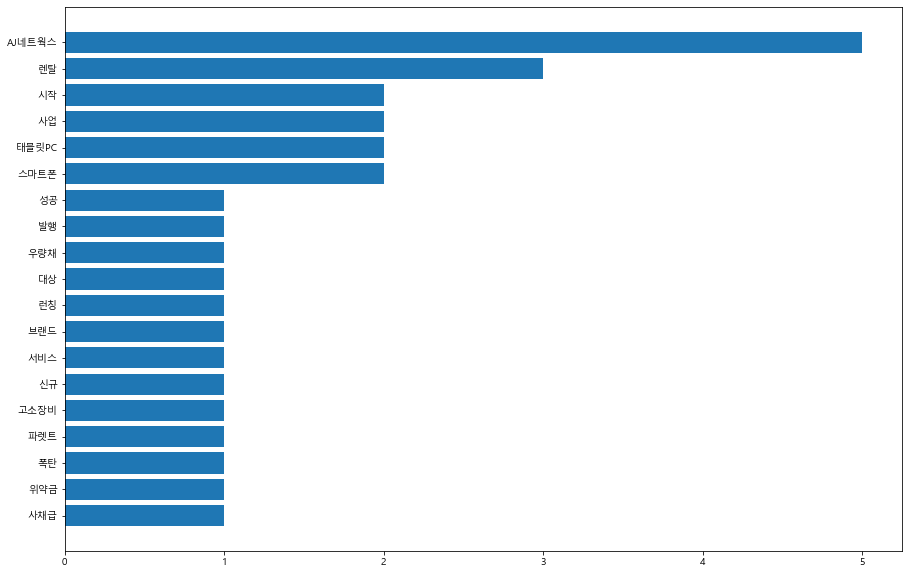

In [300]:
plt.figure(figsize=(15,10))
keyword_list = list(kw_dict.keys())
keyword_count = list(kw_dict.values())
plt.barh(keyword_list,keyword_count)
plt.show()

## 특정 단어 출현 날짜

In [301]:
# ex) 특정단어 : 렌탈
keyword = list(kw_dict.keys())[-2]
keyword

'렌탈'

In [302]:
# 출현 날짜
rp_date = []
# 날짜당 출현 횟수
cnt_list = []

df_rp = df_n['뉴스5'].loc[bgn_date:end_date]

for i in df_rp.index:
    # 날짜
    rp_date.append(i)
    # 횟수
    cnt = 0
    tokens = df_n['뉴스5'].loc[i]
    for token in tokens:
        if keyword in token:
            cnt +=1

    cnt_list.append(cnt)
        
df_rp = pd.DataFrame({'날짜':rp_date, '출현횟수':cnt_list})
df_rp = df_rp.set_index('날짜')
df_rp.head(10)

,출현횟수
날짜,
2016-01-01,0
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,1
2016-01-06,1
2016-01-07,0
2016-01-08,0
2016-01-09,0


### 출현 날짜

In [309]:
df_rp[df_rp['출현횟수'] != 0]

,출현횟수
날짜,
2016-01-05,1
2016-01-06,1
2016-01-13,1


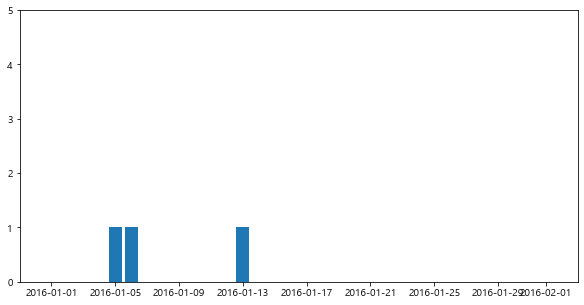

In [308]:
plt.figure(figsize=(10,5)) 
plt.ylim(0,np.max(keyword_count))
plt.bar(df_rp.index, df_rp['출현횟수'])
plt.show()

In [318]:
import FinanceDataReader as fdr
df_p = fdr.DataReader('095570','2016-01-01','2016-03-31')
df_p.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-04,9560,9730,9420,9600,20135,0.019108
2016-01-05,9450,9550,9360,9540,8225,-0.006250
2016-01-06,9610,9610,9440,9560,7271,0.002096
2016-01-07,9580,9580,9120,9300,5358,-0.027197
2016-01-08,9050,9330,9040,9220,7056,-0.008602


In [319]:
df_rp.head()

,출현횟수
날짜,
2016-01-01,0
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,1


In [324]:
df_merge = pd.merge(df_p, df_rp, left_index=True,right_index=True, how='left')
df_merge.head()

,Open,High,Low,Close,Volume,Change,출현횟수
Date,,,,,,,
2016-01-04,9560,9730,9420,9600,20135,0.019108,0.0
2016-01-05,9450,9550,9360,9540,8225,-0.006250,1.0
2016-01-06,9610,9610,9440,9560,7271,0.002096,1.0
2016-01-07,9580,9580,9120,9300,5358,-0.027197,0.0
2016-01-08,9050,9330,9040,9220,7056,-0.008602,0.0


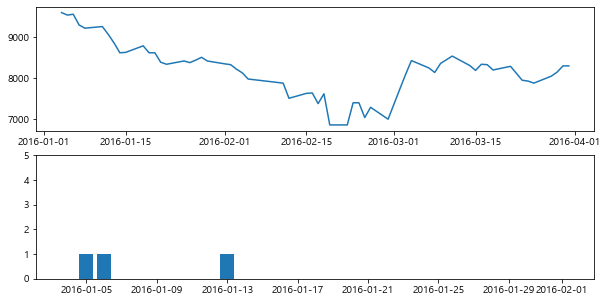

In [326]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(df_merge.index,df_merge['Close'])

plt.subplot(2,1,2)
plt.ylim(0,np.max(keyword_count))
plt.bar(df_merge.index, df_merge['출현횟수'])
plt.show()

## 키워드 빈도 증가 추세

In [327]:
kw_dict1 = dict()

# 2016-01-01 ~ 2022-03-31
bgn_date = '2016-01-01'
end_date = '2022-03-31'

token_lst = df_n['뉴스5'].loc[bgn_date:end_date]

for tokens in token_lst:

    for word in tokens:
        if not word in kw_dict1.keys():
            kw_dict1[word] = 1
        else:
            kw_dict1[word] += 1

kw_dict1 = dict(sorted(kw_dict1.items(), key = lambda x: x[1]))

kw_dict1

{'사채급': 1,
 '위약금': 1,
 '폭탄': 1,
 '고소장비': 1,
 '런칭': 1,
 '우량채': 1,
 'AJ네트웍스렌탈': 1,
 '절대': 1,
 '강자': 1,
 '호조': 1,
 '기업분석': 1,
 '예견': 1,
 '실매수': 1,
 '유지한국': 1,
 '우수특허': 1,
 '사이': 1,
 'n잡코리아': 1,
 '공동기획': 1,
 '청년희망': 1,
 '슈퍼기업': 1,
 '커플링': 1,
 '반점': 1,
 '우위': 1,
 '사우디': 1,
 '더벨박스권': 1,
 '우상향': 1,
 '과욕': 1,
 '상품': 1,
 '접목': 1,
 '전용망': 1,
 '도입': 1,
 '맞손SKTAJ': 1,
 '거침': 1,
 '라이프': 1,
 '스마트': 1,
 '구축': 1,
 '상승여': 1,
 '일대': 1,
 '동양매직': 1,
 '본입찰': 1,
 '현대홈쇼핑': 1,
 '현대글로비스테마AJ네트웍스': 1,
 '가운데': 1,
 '수익율': 1,
 '기대로봇뉴스': 1,
 'KB투자증권': 1,
 '고속성장': 1,
 '후진': 1,
 'BB렌털': 1,
 '유지LIG투자증권': 1,
 '삼해상사': 1,
 '투자': 1,
 '한국GM': 1,
 '납품': 1,
 '팰릿': 1,
 '과도한': 1,
 '주차장': 1,
 '제공': 1,
 '영원무역': 1,
 '삼성제약': 1,
 '잠재': 1,
 '입질': 1,
 '고민': 1,
 '변동성': 1,
 '등급': 1,
 '품귀': 1,
 '넷마블': 1,
 '생생코스닥': 1,
 '건설장비': 1,
 '효자': 1,
 '노릇': 1,
 '에스비씨케이AJ네트웍스': 1,
 '안랩': 1,
 '국내': 1,
 '중소기업용': 1,
 '생생코스피': 1,
 '솔루션': 1,
 '프로그램': 1,
 '판매': 1,
 '개시': 1,
 '에스비씨케이': 1,
 '상품화': 1,
 '꾸준': 1,
 '점유율': 1,
 '모델하우스': 1,
 '확산': 1,
 '전략적': 1,
 '출

In [336]:
df_keyword = pd.DataFrame()
keyword_lst = list(kw_dict1.keys())

for keyword in keyword_lst:
    # 출현 날짜
    rp_date = []
    # 날짜당 출현 횟수
    cnt_list = []

    df_rp = df_n['뉴스5'].loc[bgn_date:end_date]

    for i in df_rp.index:
        # 날짜
        rp_date.append(i)
        # 횟수
        cnt = 0
        tokens = df_n['뉴스5'].loc[i]
        for token in tokens:
            if keyword in token:
                cnt +=1

        cnt_list.append(cnt)

    df_rp = pd.DataFrame({'날짜':rp_date, '출현횟수':cnt_list})
    df_rp = df_rp.set_index('날짜')
    df_keyword = pd.concat([df_keyword,df_rp],axis=1)
    
df_keyword.columns = keyword_lst
df_keyword

,사채급,위약금,폭탄,고소장비,런칭,우량채,AJ네트웍스렌탈,절대,강자,호조,...,도로,주식,마감,상승,상위,상승률,철도운송,업종,종목,AJ네트웍스
날짜,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-04,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
